# Part I - Ford GoBike Trip Dataset
## by Zaid Baig A

## Introduction
> Data consists of info about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc. 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
#print(df.shape)
#df.head()

### What is the structure of your dataset?

> The Dataset consists of a total of 183,412 records and 16 attributes

### What is/are the main feature(s) of interest in your dataset?

> The main features in the dataset according to the initial analysis are: duration_sec, start_station_id, end_station_id, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will help support the investigation are: duration_sec, start_station_id, end_station_id, user_type, member_birth_year, member_gender

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


In [3]:
df['duration_mins'] = df['duration_sec']/60

In [4]:
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  duration_mins  
count          183412.000000  183412.000000      175147.000000  183412.000000  
mean             -122.352250    4472.906375        1984.806437      12.101307  
std                 0.116673    1664.383394          10.116689      29.906496  
min              -122.453704      11.000000        1878.000000       1.016667  
25%              -122.411726    3777.000000        1980.000000       5.416667  
50%              -122.398279    4958.000000        1987.000000       8.566667  
75%              -122.288045    5502.000000        1992.000000      13.266667  
max              -121.874119    6645.000000        2001.000000    1424.066667

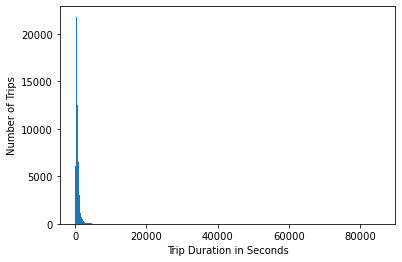

In [5]:
plt.hist(data=df, x='duration_sec', bins=1000)
plt.xlabel('Trip Duration in Seconds')
plt.ylabel('Number of Trips');

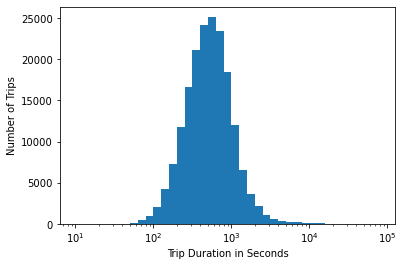

In [6]:
bins = 10**np.arange(1, 5, 0.1)
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xlabel('Trip Duration in Seconds')
plt.ylabel('Number of Trips')
plt.xscale('log');

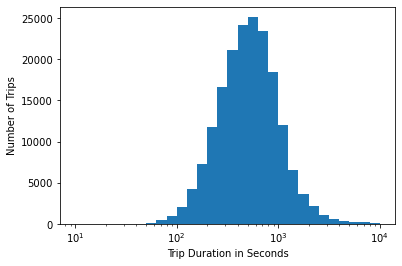

In [7]:
bins = 10 ** np.arange(1, 4.0+0.1, 0.1)
ticks = [10, 30, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(val) for val in ticks]
df_copy=df.query('duration_sec < 10000')
#df_copy.describe()
plt.hist(data=df_copy, x='duration_sec', bins=bins)
plt.xticks(ticks,labels)
plt.xlabel('Trip Duration in Seconds')
plt.ylabel('Number of Trips')
plt.xscale('log');

In [8]:
df_copy.describe()

duration_sec  start_station_id  start_station_latitude  \
count  182951.000000     182754.000000           182951.000000   
mean      657.891244        138.618569               37.771208   
std       624.759482        111.756950                0.099631   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       513.000000        104.000000               37.780760   
75%       793.000000        239.000000               37.797280   
max      9994.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            182951.000000   182754.000000         182951.000000   
mean               -122.352618      136.243858             37.771409   
std                   0.117139      111.476795              0.099539   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.285633      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  duration_mins  
count          182951.000000  182951.000000      174789.000000  182951.000000  
mean             -122.352202    4474.026215        1984.806859      10.964854  
std                 0.116715    1663.752094          10.118117      10.412658  
min              -122.453704      11.000000        1878.000000       1.016667  
25%              -122.411726    3781.000000        1980.000000       5.416667  
50%              -122.397437    4958.000000        1987.000000       8.550000  
75%              -122.288045    5502.000000        1992.000000      13.216667  
max              -121.874119    6645.000000        2001.000000     166.566667

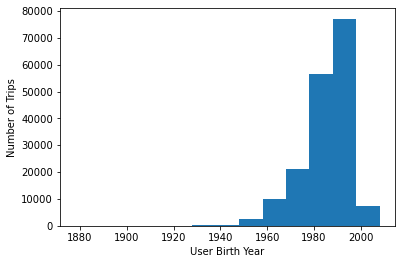

In [9]:
plt.hist(data=df, x='member_birth_year', bins=np.arange(df['member_birth_year'].min(),df['member_birth_year'].max()+10,10))
plt.xlabel('User Birth Year')
plt.ylabel('Number of Trips');

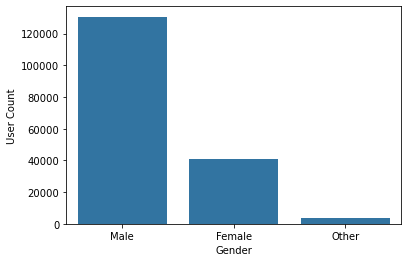

In [10]:
base_color = sb.color_palette()[0]
gender_order = df['member_gender'].value_counts().index
sb.countplot(data = df, x = 'member_gender', color = base_color, order=gender_order)
plt.xlabel('Gender')
plt.ylabel('User Count');

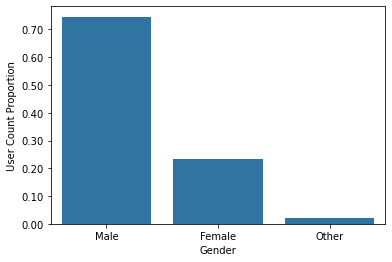

In [11]:
total = df['member_gender'].value_counts().sum()
max_value = df['member_gender'].value_counts()[0]
max_prop = max_value / total

tick_props = np.arange(0, max_prop, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = df, x = 'member_gender', color = base_color, order=gender_order)
plt.yticks(tick_props * total, tick_names)
plt.xlabel('Gender')
plt.ylabel('User Count Proportion');



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Duration_sec attribute consisted of data in the amount of time on the rental in seconds which is a bit complicated in terms of giving out the clearer picture. Conversion of seconds data in minutes is performed and when analyzing the data we find that we the range between 1 min and 1424 mins (which is approx 24hrs or 1 day)
1. From our intial analysis we see that the average time spent on the bike according to the sample set a little below a thousand seconds which in terms of minutes is approx 15mins.
2. In our gender comaprison we find that the majority of the users are actually male with more than 70%. With women only having a little over 20% of the distribution
3. For age comparison analysis we find that the distribution is right skewed with the majority of the population who were born between 1980s and 2000s

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes when comparing the distribution for duration_sec we see the range is actually between 60 and 85444. This results in not getting a clear histogram where the majority of the distribution is within 100s and 10000s.
1. To overcome this we modify the x axis scale in terms of logarithmic, so that the distribution in x axis covers logarithmic and we get a clear distribution in the histogram
2. Regarding the seconds data we created a new column which contains the duration_sec data in terms of minutes to truly understand the distribution of this attribute

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

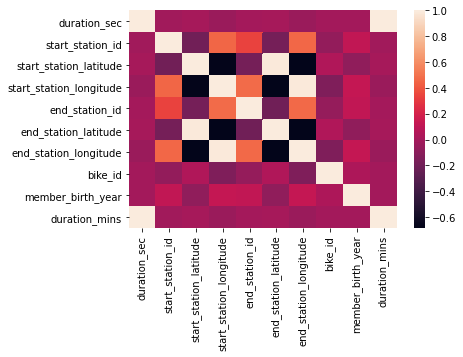

In [12]:
sb.heatmap(df.corr(), cmap=sb.color_palette("rocket", as_cmap=True));

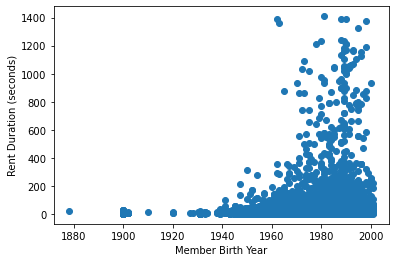

In [13]:
plt.scatter(data=df, x='member_birth_year', y='duration_mins')
plt.xlabel('Member Birth Year')
plt.ylabel('Rent Duration (seconds)');

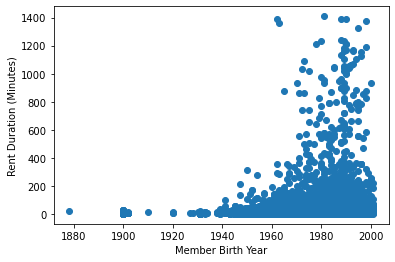

In [14]:
plt.scatter(data=df, x='member_birth_year', y='duration_mins')
plt.xlabel('Member Birth Year')
plt.ylabel('Rent Duration (Minutes)');

From Comparing the data we first notice that any person who have the rent duration above 600 mins are pseudo data but from this we see that we can reject the hypothesis on it, as there are users who have rented bikes for more than 12+ hrs.

In [15]:
df['user_type'].nunique()

2

In [16]:
min(df['start_time'])

'2019-02-01 00:00:20.6360'

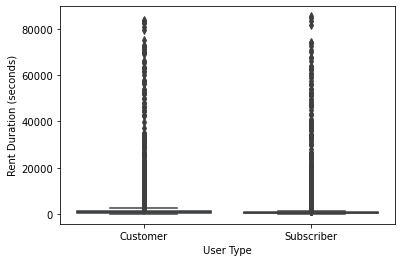

In [17]:
sb.boxplot(data=df, x='user_type', y='duration_sec')
plt.xlabel('User Type')
plt.ylabel('Rent Duration (seconds)');

Due to such varied and existence on exagerated outliers it is not possible to get a clear data distribution graph for either using box plot or violin. To overcome this limitation we will be using a range beween 0 to an hard coded x percentile of the total population where x is defined through the means of trial and error.

1. We see that majority of the population in all weekdays rent the bikes for a about an hour. And this remains constant thoughout the whole week.
2. The distribution as seen from the violin plots for the first 80th percentile of the data is constant through out the week

In [18]:
df_copy=df.copy()
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])

In [19]:
df_copy['Start_Weekday'] = df_copy['start_time'].dt.day_name()
df_copy['End_Weekday'] = df_copy['end_time'].dt.day_name()

In [20]:
df_copy.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  duration_mins Start_Weekday  \
0          Male                      No     869.750000      Thursday   
1           NaN                      No     708.683333      Thursday   
2          Male                      No    1030.900000      Thursday   
3         Other                      No     608.166667      Thursday   
4          Male                     Yes      26.416667      Thursday   

  End_Weekday  
0      Friday  
1      Friday  
2      Friday  
3      Friday  
4      Friday

In [21]:
df_copy['start_station_name'].nunique()

329

In [22]:
df_copy['duration_hrs'] = df_copy['duration_sec']/3600

In [23]:
len(df_copy.query('duration_hrs <= 2'))

182700

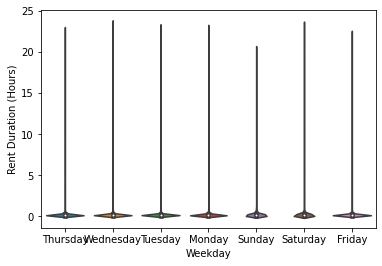

In [24]:
sb.violinplot(data=df_copy, x='Start_Weekday', y='duration_hrs')
plt.xlabel('Weekday')
plt.ylabel('Rent Duration (Hours)');

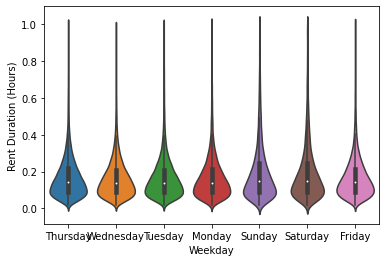

In [25]:
sb.violinplot(data=df_copy.query('duration_hrs <= 1'), x='Start_Weekday', y='duration_hrs')
plt.xlabel('Weekday')
plt.ylabel('Rent Duration (Hours)');

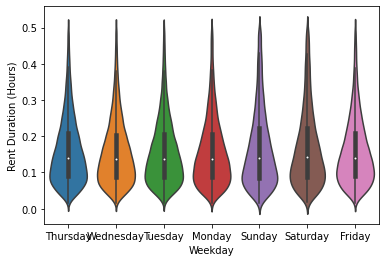

In [26]:
sb.violinplot(data=df_copy.query('duration_hrs <= 0.5'), x='Start_Weekday', y='duration_hrs')
plt.xlabel('Weekday')
plt.xticks(rotation=15);
plt.ylabel('Rent Duration (Hours)');

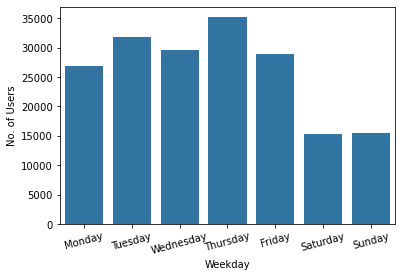

In [27]:
order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sb.countplot(data=df_copy, x='Start_Weekday', color=base_color, order=order)
plt.xlabel('Weekday')
plt.ylabel('No. of Users')
plt.xticks(rotation=15);

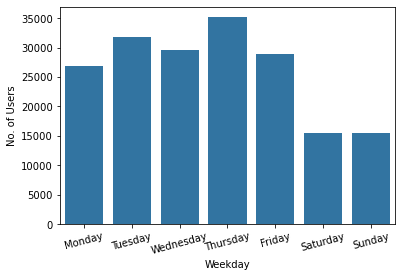

In [28]:
sb.countplot(data=df_copy, x='End_Weekday', color=base_color, order=order)
plt.xlabel('Weekday')
plt.ylabel('No. of Users')
plt.xticks(rotation=15);

Comaparing Weekday and its respective count of it, we find that suprisingly many users rent bikes on a thrusday with tuesday being the second most popular. Same for the rent end date as well, as this makes sense as the rent duration is only a max of 24hrs.
We also see that weekends are the least popular, which could be hypothesised that these bikes are being used during weekend where either the user is using it for travelling to work or school or other chores

In [29]:
df_copy.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
duration_mins                     float64
Start_Weekday                      object
End_Weekday                        object
duration_hrs                      float64
dtype: object

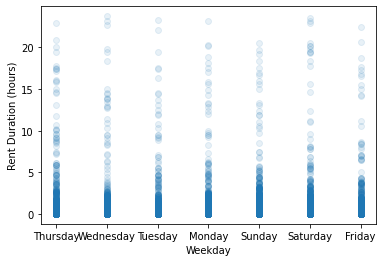

In [30]:
plt.scatter(data = df_copy , x = 'Start_Weekday' , y = 'duration_hrs' , alpha = 0.1)
plt.xlabel('Weekday')
plt.ylabel('Rent Duration (hours)');

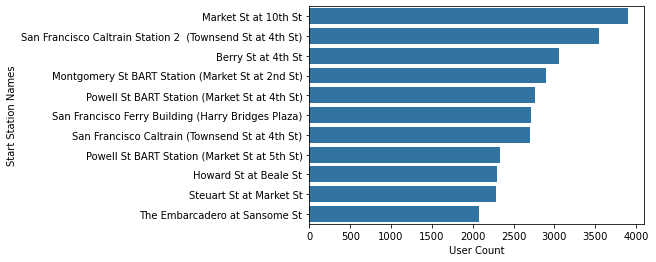

In [31]:
start_station_counts = df_copy['start_station_name'].value_counts()[:11].sort_values()[::-1]
sb.barplot(x=start_station_counts,y=start_station_counts.index, color=base_color)
plt.xlabel('User Count')
plt.ylabel('Start Station Names');

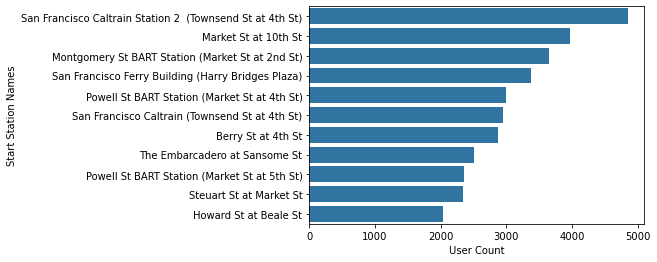

In [32]:
end_station_counts = df_copy['end_station_name'].value_counts()[:11].sort_values()[::-1]
sb.barplot(x=end_station_counts,y=end_station_counts.index, color=base_color)
plt.xlabel('User Count')
plt.ylabel('Start Station Names');

We find that the most popular station where users have as the starting point for the bike rental is "Market Street at 10th street" and the favourite end station to conclude their usage is "San Francisco Caltrain Station 2"

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Due to such varied and existence on exagerated outliers it is not possible to get a clear data distribution graph for either using box plot or violin. To overcome this limitation we will be using a range beween 0 to an hard coded x percentile of the total population where x is defined through the means of trial and error.
1. We find that the most popular station where users have as the starting point for the bike rental is "Market Street at 10th street" and the favourite end station to conclude their usage is "San Francisco Caltrain Station 2"
2. Comaparing Weekday and its respective count of it, we find that suprisingly many users rent bikes on a thrusday with tuesday being the second most popular. Same for the rent end date as well, as this makes sense as the rent duration is only a max of 24hrs.
3. We also see that weekends are the least popular, which could be hypothesised that these bikes are being used during weekend where either the user is using it for travelling to work or school or other chores
4. We see that majority of the population in all weekdays rent the bikes for a about 10-20 mins at most. And this remains constant thoughout the whole week.
5. The distribution as seen from the violin plots for the first 80th percentile of the data is constant through out the week

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> An interesting observation we found regarding the correlation between the features regarding the station location latitude and longitude variables. As they have a stronger relation which makes sense as the start and end station for all rentals would take place within a fixed area constantly and these rental bikes would rarely be used for long distance travels

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

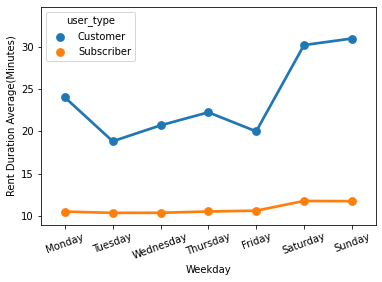

In [33]:
sb.pointplot(data=df_copy, x='Start_Weekday', y='duration_mins', hue='user_type', errwidth=0, order=order)
plt.xlabel('Weekday')
plt.ylabel('Rent Duration Average(Minutes)')
plt.xticks(rotation=20);

We find that for most non-subcriber type customer make use of rental bikes on more than the subcribers of it. This would mainly be due to non-subscriber may not always want the need for rental bikes and when they need it they would tend to make use of it more than an average subscriber.

We also see that subscribers rent duration is constantly at 10 mins during Monday to Friday and about +2 mins during the weekends when compared to the weekdays. This looks like subscribers have a fixed schedule and have incorporated the use rental bikes in their day to day activities.

The Same when compared to Non-Subscribers we find that the usage of rental bikes is again more during on weekends than during the weekdays. And the rent duration is not uniform but varies from day to day. Hypothising a pattern is quite difficult in this case

In [34]:
df_copy.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  duration_mins Start_Weekday  \
0          Male                      No     869.750000      Thursday   
1           NaN                      No     708.683333      Thursday   
2          Male                      No    1030.900000      Thursday   
3         Other                      No     608.166667      Thursday   
4          Male                     Yes      26.416667      Thursday   

  End_Weekday  duration_hrs  
0      Friday     14.495833  
1      Friday     11.811389  
2      Friday     17.181667  
3      Friday     10.136111  
4      Friday      0.440278

In [35]:
df_copy['Age'] = 2021 - df_copy['member_birth_year']

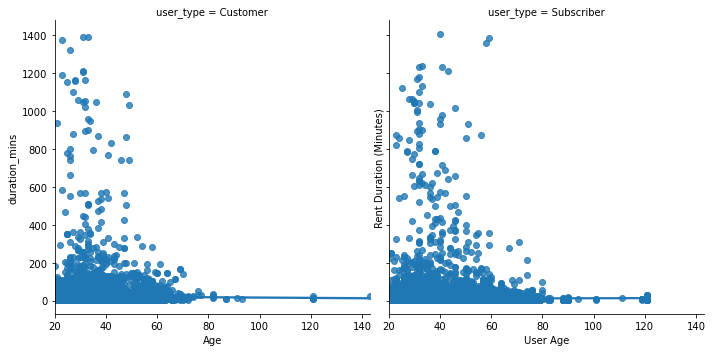

In [36]:
fg = sb.FacetGrid(data = df_copy, col = 'user_type', height = 5, margin_titles = True)
fg.map(sb.regplot, 'Age', 'duration_mins')
plt.xlabel('User Age')
plt.ylabel('Rent Duration (Minutes)');

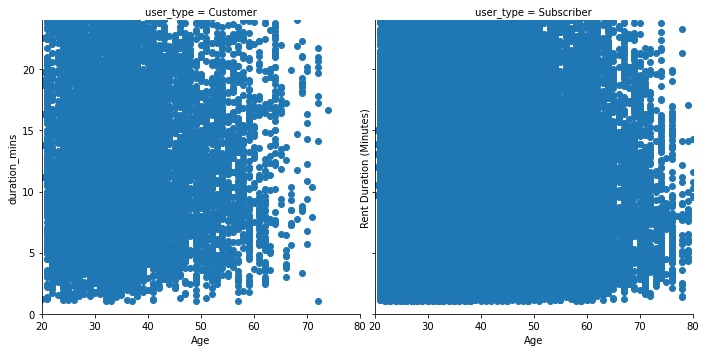

In [37]:
fg = sb.FacetGrid(data = df_copy, col = 'user_type', height = 5, margin_titles = True)
fg.map(plt.scatter, 'Age', 'duration_mins')
plt.xlim(20,80)
plt.ylim(0,120)
plt.xlabel('Age')
plt.ylabel('Rent Duration (Minutes)');

From these graphs comparing the user age, type and rent duration.Where for Customer user type, We find that the demographic of rental bike users who use longer than 7hrs are users between the ages 20 and 50.

And same goes for Subscriber usertype where the average user's age is in the range 20 and 60 which is a +10 years when comparing both user types.

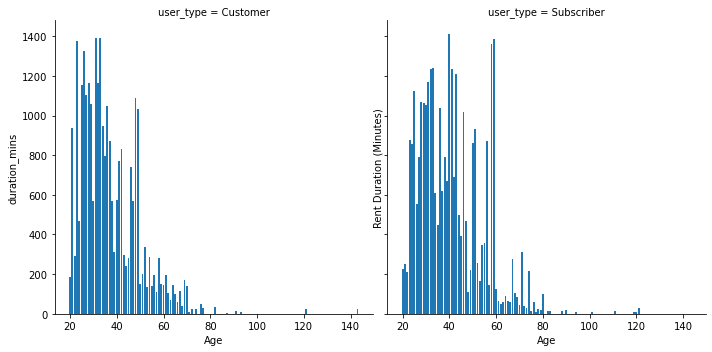

In [38]:
fg = sb.FacetGrid(data = df_copy, col = 'user_type', height = 5, margin_titles = True)
fg.map(plt.bar, 'Age', 'duration_mins')
plt.xlabel('Age')
plt.ylabel('Rent Duration (Minutes)');

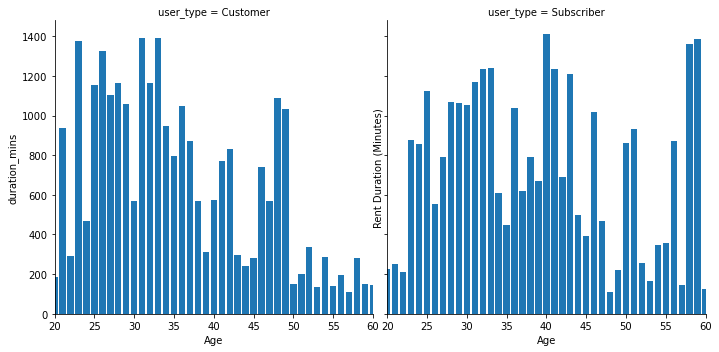

In [39]:
fg = sb.FacetGrid(data = df_copy, col = 'user_type', height = 5, margin_titles = True)
fg.map(plt.bar, 'Age', 'duration_mins')
plt.xlabel('Age')
plt.ylabel('Rent Duration (Minutes)')
plt.xlim(20,60);

Here we get a clear view of the age distribution with respect to rent duration. Where for user type who are customrs the rent duration is maximum for the age group between 22 to approx 38 and then ther is again a slight increate after approx 46 and before 50.

The same pattern can be witnessed in user type as subscribers where now the max rent duration range per age is now between 22 and 44 but distributed in an varied fashion. And the next increase is witnessed at around 55-60 age group

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We find that for most non-subcriber type customer make use of rental bikes on more than the subcribers of it. This would mainly be due to non-subscriber may not always want the need for rental bikes and when they need it they would tend to make use of it more than an average subscriber.

>We also see that subscribers rent duration is constantly at 10 mins during Monday to Friday and about 12 mins during the weekends. This looks like subscribers have a fixed schedule and have incorporated the use rental bikes in their day to day activities.

>The Same when compared to Non-Subscribers we find that the usage of rental bikes is again more during on weekends than during the weekdays. And the rent duration is not uniform but varies from day to day. Hypothising a pattern is quite difficult in this case

> From these graphs comparing the user age, type and rent duration.Where for Customer user type, We find that the demographic of rental bike users who use longer than 7hrs are users between the ages 20 and 50. And same goes for Subscriber usertype where the average user's age is in the range 20 and 60 which is a +10 years when comparing both user types.

> Here we get a clear view of the age distribution with respect to rent duration. Where for user type who are customrs the rent duration is maximum for the age group between 22 to approx 38 and then ther is again a slight increate after approx 46 and before 50. The same pattern can be witnessed in user type as subscribers where now the max rent duration range per age is now between 22 and 44 but distributed in an varied fashion. And the next increase is witnessed at around 55-60 age group.

### Were there any interesting or surprising interactions between features?

> Yes there is an interesting interaction between the user type and the rent duration they spend. Where subscribers utilize barely 10 to 15 minutes or so during a day with respect to the rent duration and for customers they 

## Conclusions
>The main finding we found during the data exploration phase are as follow:
1. The average time spent on the bike according to the sample set a little below a thousand seconds which in terms of minutes is approx 15mins
2. In our gender comaprison we find that the majority of the users are actually male with more than 70%. With women only having a little over 20% of the distribution
3. Majority of the users have birth years between between 1980s and 2000s, i.e, their approx age range is 20 to 40
4. the most popular station where users have as the starting point for the bike rental is "Market Street at 10th street" and the favourite end station to conclude their usage is "San Francisco Caltrain Station 2"
5. The number of users in weekends are way lesser than the number of users during the weekdays
6. Most non-subcriber type customer make use of rental bikes on more than the subcribers in terms of rent duration
7. Subscribers rent duration is constantly at 10 mins during Monday to Friday and about 12 mins during the weekends. This looks like subscribers have a fixed schedule and have incorporated the use rental bikes in their day to day activities.